<a href="https://colab.research.google.com/github/nimnathw/bitcoin-price-prediction/blob/master/analysis_trading_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import sys
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
!pwd

/content/drive/MyDrive/Colab Notebooks


In [5]:
from google.colab import files
#uploaded = files.upload()

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the cleaned data into a DataFrame
df = pd.read_csv("data.csv")
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'] > '2022-01-01']
df.set_index('date', inplace=True)


# view data
df.describe()


,ACDGNO,AWHMAN,DGS10,DGS1MO,DGS3MO,DGS5,DGS6MO,IC4WSA,M2SL,NASDAQ100,PCUADLVWRADLVWR,PERMIT,RETAILIMSA,SP500,T10YFF,UMCSENT,market_caps,prices,total_volumes
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,2.090000e+02,209.000000,2.090000e+02
mean,44176.349282,41.187081,2.799043,1.247464,1.653158,2.827560,2.100239,213889.952153,21618.207656,13021.991914,189.768967,1707.662201,711141.215311,4136.572488,1.551627,59.032536,5.811936e+11,30534.719520,2.893393e+10
std,1751.369590,0.197765,0.675100,1.157003,1.269436,0.790562,1.320076,22126.938626,91.395895,1352.836783,2.833958,131.002072,27618.289319,302.386048,0.623636,5.030722,1.859799e+11,9871.561187,1.061728e+10
min,41200.000000,40.900000,1.630000,0.020000,0.080000,1.370000,0.220000,170500.000000,21351.600000,10692.060000,185.559000,1512.000000,660783.000000,3577.030000,0.270000,50.000000,3.551945e+11,18539.635238,1.180719e+10
25%,43202.000000,41.000000,2.200000,0.180000,0.460000,2.180000,0.860000,196750.000000,21607.400000,11875.630000,186.557000,1564.000000,692095.000000,3900.110000,1.000000,58.200000,3.931043e+11,20574.840592,2.207497e+10
50%,44667.000000,41.100000,2.860000,0.850000,1.170000,2.910000,1.640000,215750.000000,21636.100000,12881.790000,189.901000,1695.000000,723116.000000,4131.930000,1.680000,58.600000,5.648852e+11,29655.026132,2.685591e+10
75%,45188.000000,41.200000,3.150000,2.240000,2.710000,3.250000,3.150000,231750.000000,21649.600000,14149.120000,192.286000,1841.000000,738147.000000,4392.590000,2.020000,62.800000,7.700967e+11,40488.877918,3.213122e+10
max,46602.000000,41.600000,4.250000,3.760000,4.230000,4.450000,4.580000,249500.000000,21739.700000,16501.770000,194.187000,1879.000000,741260.000000,4796.560000,2.660000,67.200000,9.014300e+11,47459.261238,6.598570e+10


In [72]:
# Define the number of lags
n_lags = 7

# Add lagged values of the dependent variable
for i in range(1, n_lags+1):
    df[f'prices_lag{i}'] = df['prices'].shift(i)

# Drop rows with missing values
df.dropna(inplace=True)
df.head()

,ACDGNO,AWHMAN,DGS10,DGS1MO,DGS3MO,DGS5,DGS6MO,IC4WSA,M2SL,NASDAQ100,...,market_caps,prices,total_volumes,prices_lag1,prices_lag2,prices_lag3,prices_lag4,prices_lag5,prices_lag6,prices_lag7
date,,,,,,,,,,,,,,,,,,,,,
2022-02-02,41497.0,41.6,1.78,0.04,0.19,1.60,0.45,228500.0,21708.4,15139.74,...,7.361023e+11,38835.694943,1.710912e+10,38555.534461,37983.151499,37276.839558,36870.440167,36988.928511,36774.007142,36306.409440
2022-02-03,41497.0,41.6,1.82,0.03,0.20,1.66,0.48,228500.0,21708.4,14501.11,...,7.006456e+11,37000.982499,1.670991e+10,38835.694943,38555.534461,37983.151499,37276.839558,36870.440167,36988.928511,36774.007142
2022-02-04,41497.0,41.6,1.93,0.05,0.23,1.78,0.56,228500.0,21708.4,14694.35,...,7.030033e+11,37101.351594,1.613630e+10,37000.982499,38835.694943,38555.534461,37983.151499,37276.839558,36870.440167,36988.928511
2022-02-07,41497.0,41.6,1.92,0.03,0.27,1.76,0.58,216750.0,21708.4,14571.25,...,8.049420e+11,42475.543221,1.320649e+10,37101.351594,37000.982499,38835.694943,38555.534461,37983.151499,37276.839558,36870.440167
2022-02-08,41497.0,41.6,1.96,0.03,0.25,1.81,0.59,216750.0,21708.4,14747.03,...,8.333925e+11,43910.929986,2.417186e+10,42475.543221,37101.351594,37000.982499,38835.694943,38555.534461,37983.151499,37276.839558


In [73]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit

# Get the dependent variable 'prices'
y = df['prices']

# Get the independent variables
X = df.drop(columns=['prices']) 

# Define the number of splits
n_splits = 3

# Create the TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=n_splits)

# Split the data into training and test sets
for train_index, test_index in tscv.split(df):
    X_train, X_test = df.iloc[train_index, :], df.iloc[test_index, :]
    y_train, y_test = df.iloc[train_index, -1], df.iloc[test_index, -1]

# Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(scaler.scale_.shape)

(26,)


In [65]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the LSTM model
model = Sequential()
# Add first LSTM layer with 64 units and input shape defined as the number of features in the X_train dataset
model.add(LSTM(units=64, input_shape=(X_train.shape[1],1), return_sequences=True))
# Add a second LSTM layer with 64 units
model.add(LSTM(units=64))
# Add a dropout layer to help prevent overfitting
model.add(Dropout(0.2))
# Add a fully connected Dense layer with 64 units
model.add(Dense(64))
# Add fully connected Dense layer with one unit to produce the output
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping and checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss', mode='min')

# Train the model on the training data
history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, batch_size=32, callbacks=[early_stopping, checkpoint])


Epoch 1/1000
4/4 [==============================] - 7s 593ms/step - loss: 1459336704.0000 - val_loss: 476044448.0000
Epoch 2/1000
4/4 [==============================] - 0s 17ms/step - loss: 1459305728.0000 - val_loss: 476055424.0000
Epoch 3/1000
4/4 [==============================] - 0s 35ms/step - loss: 1459247488.0000 - val_loss: 476043264.0000
Epoch 4/1000
4/4 [==============================] - 0s 30ms/step - loss: 1459102336.0000 - val_loss: 475864800.0000
Epoch 5/1000
4/4 [==============================] - 0s 31ms/step - loss: 1458778368.0000 - val_loss: 475565888.0000
Epoch 6/1000
4/4 [==============================] - 0s 30ms/step - loss: 1458355840.0000 - val_loss: 475275200.0000
Epoch 7/1000
4/4 [==============================] - 0s 36ms/step - loss: 1457893376.0000 - val_loss: 475022976.0000
Epoch 8/1000
4/4 [==============================] - 0s 33ms/step - loss: 1457459328.0000 - val_loss: 474781312.0000
Epoch 9/1000
4/4 [==============================] - 0s 34ms/step - loss

In [66]:
from keras.models import load_model

# Load the best model
model = load_model('best_model.h5')

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

2/2 [==============================] - 1s 14ms/step - loss: 4539013.0000
Test Loss: 4539013.0


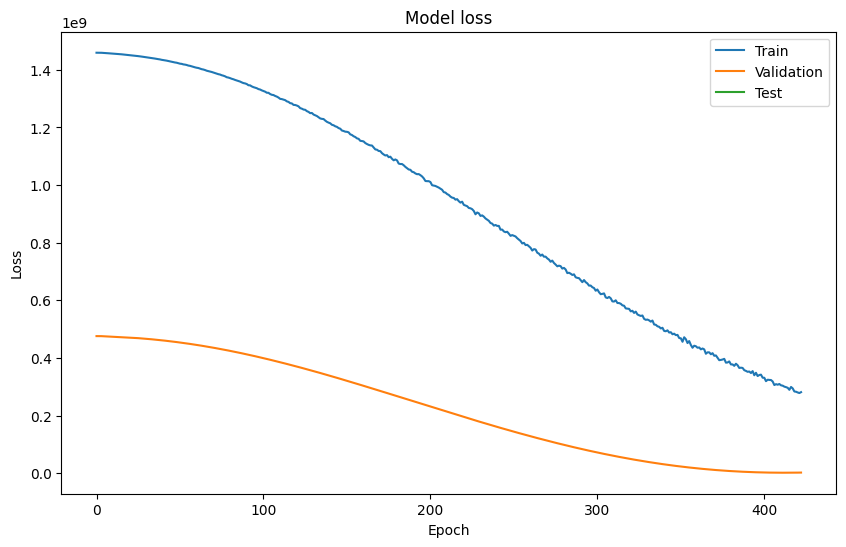

In [86]:
import matplotlib.pyplot as plt

# Plot the training, validation, and test loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(test_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper right')
plt.show()


In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Calculate variance of transformed y_test
y_test_transformed_var = np.var(y_test)
print('Variance of y_test_transformed:', y_test_transformed_var)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"rmse: {rmse}")


2/2 [==============================] - 0s 9ms/step
Mean Absolute Error: 1950.6016750589292
Variance of y_test_transformed: 1921730.9282181421
rmse: 2118.9025393215984


In [ ]:
# Create an index based on the length of y_test
index = range(len(y_test))

# Plot the actual and predicted prices using the index as the x-axis
plt.figure(figsize=(10,6))
plt.plot(index, y_test, label='Actual')
plt.plot(index, y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

In [55]:
!pip install pmdarima

from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
import pandas as pd
from pmdarima.arima import auto_arima

df = pd.read_csv("data.csv")
X = df.drop("prices", axis=1) # drop prices column to create X
y = df["prices"] # select prices column to create y


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



stepwise_model = auto_arima(y_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(stepwise_model.order)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 73.3 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=7548.534, Time=0.53 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=7885.289, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7674.864, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.37 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=7683.612, Time=0.43 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=7548.275, Time=1.32 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=7604.800, Time=0.96 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=7549.380, Time=1.86 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=7548.206, Time=2.10 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=7547.809, Time=1.82 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=7548.577, Time=1.28 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=7608

In [56]:
# Fit an ARIMA model to the time series data
(p,d,q) = (2, 1, 3)
model_ARIMA = ARIMA(y_train, order=(p, d, q))
model_ARIMA_fit = model.fit()



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
